<a href="https://colab.research.google.com/github/sadafyousuf/Spoon-Knife/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [9]:
import io
datasets = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))


In [10]:
na_data = datasets.isna().sum()
print(na_data)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


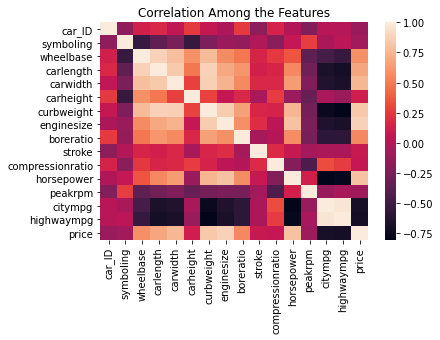

In [11]:
## Show the Correlation Among the Features
correlation = datasets.corr()
ax = plt.axes()
corr = sn.heatmap(correlation, ax = ax)
ax.set_title("Correlation Among the Features")
plt.show()


In [13]:
## Save the Plot 
figure = corr.get_figure()
figure.savefig("corr.png", dpi = 300)


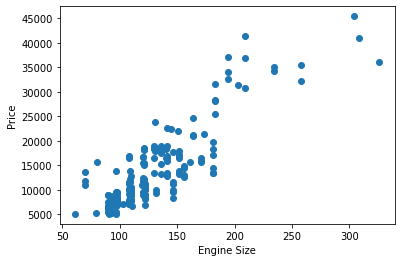

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(datasets["enginesize"], datasets["price"])
plt.ylabel("Price")
plt.xlabel("Engine Size")
plt.show()
plt.savefig("plotprc.png", dpi = 300)


In [15]:
## Separate Engine Size Become 3 Different Classes
def separate(engine_size) :
    if engine_size < 150 :
        return "<150"
    elif engine_size >= 150 and engine_size < 221 :
        return "150-220"
    else : 
        return "220> "
engine_sz =  datasets["enginesize"]
engine_sz["class"] = engine_sz.map(lambda x : separate(x))
engine_sz["class"].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0       <150
1       <150
2    150-220
3       <150
4       <150
Name: enginesize, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


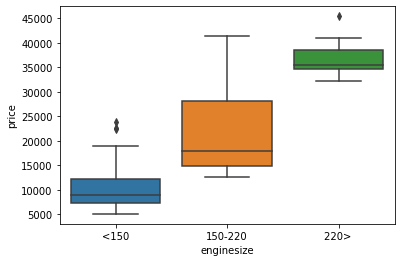

<Figure size 432x288 with 0 Axes>

In [16]:
## Make the Boxplot to Look the Correlation Between Engine Size
fig, axs = plt.subplots()
box = sn.boxplot(engine_sz["class"], datasets["price"], ax = axs)
plt.show()
plt.savefig("box_plot.png", dpi = 300)

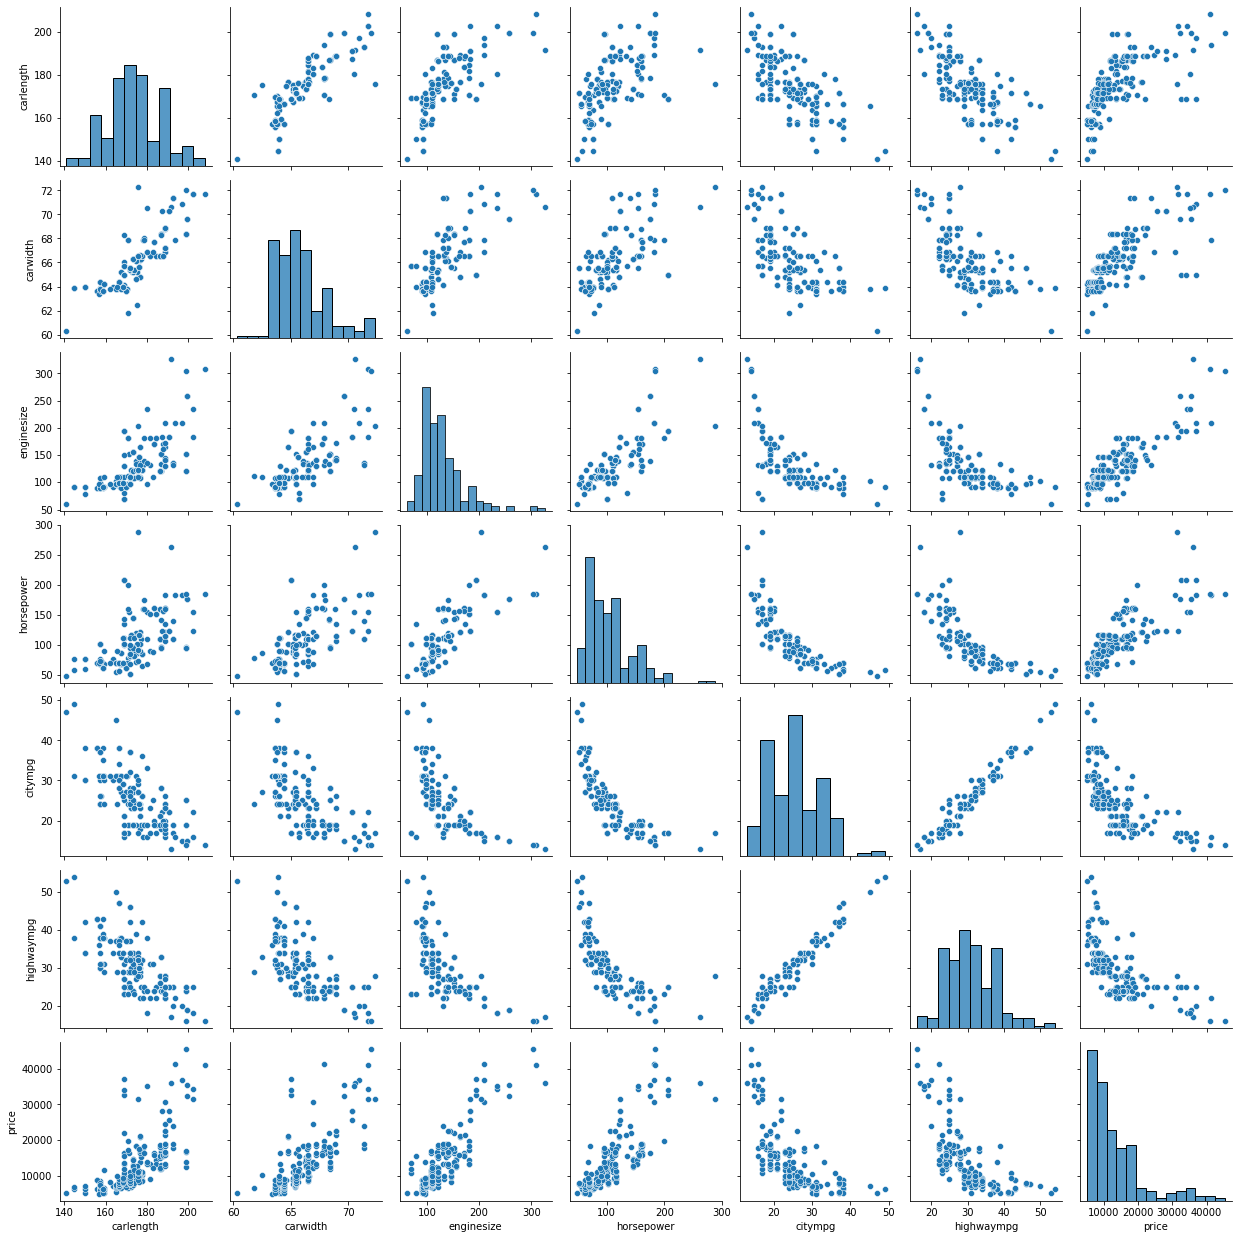

In [17]:
## Make Pairplot for The Features that Have Correlation to Predict Car Price
## Consider with The Heatmap tha Have We Made
X = datasets[["carlength", "carwidth", "enginesize", "horsepower", "citympg", "highwaympg"]]
Y = datasets["price"]
data = datasets[["carlength", "carwidth", "enginesize", "horsepower", "citympg", "highwaympg", "price"]]
pair_plot = sn.pairplot(data = data)
plt.show()
pair_plot.savefig("pair.png", dpi = 800)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("Train Size : {}".format(X_train.shape[0]))
print("Test Size : {}".format(X_test.shape[0]))


Train Size : 164
Test Size : 41


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression(n_jobs = 1)
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

r2_score = r2_score(Y_test, Y_predict)
print("R2 Score : {}".format(r2_score))
print("Mean Absolute Error : {}".format(mean_absolute_error(Y_test, Y_predict)))


R2 Score : 0.8072268315661396
Mean Absolute Error : 2857.6224554358632
